In [81]:
import pandas as pd
#exo1
train_raw = pd.read_csv("train.csv")
train_copy=train_raw.copy()
print("Number of rows before removing duplicates:", train_raw.shape)
print("Number of duplicate rows:", train_copy.duplicated().sum())
train_copy.drop_duplicates(keep='first')
print("Number of rows after removing duplicates:", train_copy.shape)




Number of rows before removing duplicates: (891, 12)
Number of duplicate rows: 0
Number of rows after removing duplicates: (891, 12)


In [82]:
#exo2
from sklearn.impute import SimpleImputer

missingValue=train_raw.isna().sum()
missingpct=(missingValue/len(train_raw))*100
missingDF=pd.DataFrame({

        'Missing Count': missingValue,
        'Missing % ':missingpct
})
print("columns with missing value ",missingDF[missingDF['Missing Count']>0 ])
#Age between 5 and 50% we impute
age_amputer=SimpleImputer(strategy='median')
train_copy['Age']=age_amputer.fit_transform(train_copy[['Age']])
#Cabin >50% we drop the columns
train_copy=train_copy.drop(columns=['Cabin'])
#Embarked <5% we drop the raw
train_copy=train_copy.dropna(subset=['Embarked'])

#we verify the missing value now
missingValueAfterClean=train_copy.isna().sum()
print(missingValueAfterClean)

columns with missing value            Missing Count  Missing % 
Age                 177   19.865320
Cabin               687   77.104377
Embarked              2    0.224467
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [60]:
train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
#exo3
train_copy['Family Size']=train_copy['SibSp']+train_copy['Parch']+1
train_copy['Title']= train_copy["Name"].str.extract(r',\s*([^.]+)\.')
train_embarkedDummies = pd.get_dummies(train_copy['Embarked'], prefix='Embarked', drop_first=True).astype(int)
train_copy=pd.concat([train_copy, train_embarkedDummies], axis=1)
sex_mapping={'male':0,'female':1}
train_copy['Sex_encoded']=train_copy['Sex'].map(sex_mapping)

title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    # map rare/foreign titles
    'Dr': 'Rare',
    'Rev': 'Rare',
    'Col': 'Rare',
    'Mlle': 'Miss',
    'Major': 'Rare',
    'Ms': 'Mrs',
    'Mme': 'Mrs',
    'Don': 'Rare',
    'Lady': 'Rare',
    'Sir': 'Rare',
    'Capt': 'Rare',
    'the Countess': 'Rare',
    'Jonkheer': 'Rare'
}
train_copy['Title']=train_copy['Title'].map(title_mapping)
train_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,Title,Embarked_Q,Embarked_S,Sex_encoded,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.014151,S,2,Mr,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.139136,C,2,Mrs,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.015469,S,1,Miss,0,1,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.103644,S,2,Mrs,0,1,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.015713,S,1,Mr,0,1,0,0,1


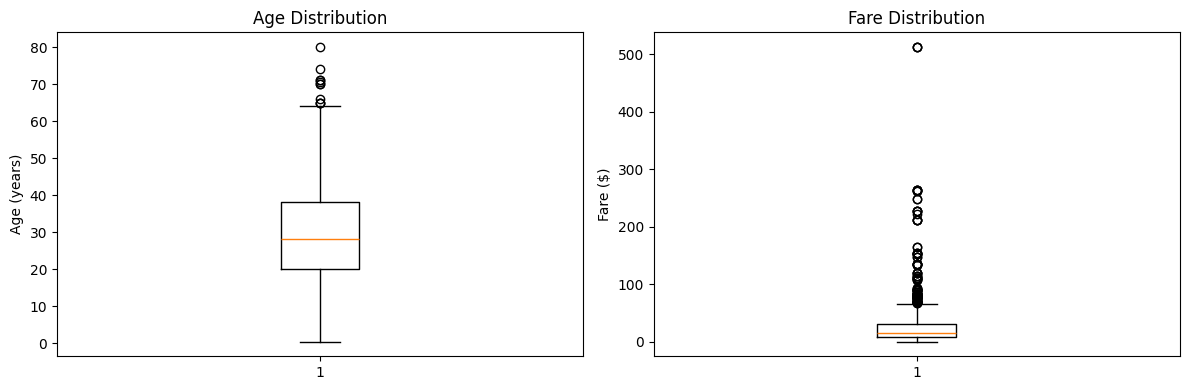

before capping 80.0
after capping 62.74000000000001
before capping 512.3292
after capping 211.3375


In [93]:
#exo4
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].boxplot(train_raw['Age'].dropna())
axes[0].set_title('Age Distribution')
axes[0].set_ylabel('Age (years)')

axes[1].boxplot(train_raw['Fare'].dropna())
axes[1].set_title('Fare Distribution')
axes[1].set_ylabel('Fare ($)')

plt.tight_layout()
plt.show()

Q1_age=train_raw['Age'].quantile(0.25)
Q3_age=train_raw['Age'].quantile(0.75)
IQR_age=Q3_age-Q1_age
Lower_bound_age = (Q1_age - 1.5)*IQR_age
Upper_bound_age = (Q3_age + 1.5)*IQR_age
age_cap=train_raw['Age'].quantile(0.98)
outliers_count_age=(train_raw['Age'] > age_cap).sum()
train_copy['Age'] = train_raw['Age'].clip(upper=age_cap)
print("before capping",train_raw['Age'].max())
print("after capping",train_copy['Age'].max())


Q1_fare=train_raw['Fare'].quantile(0.25)
Q3_fare=train_raw['Fare'].quantile(0.75)
IQR_fare=Q3_age-Q1_fare
Lower_bound_fare = (Q1_fare - 1.5)*IQR_fare
Upper_bound_fare = (Q3_fare + 1.5)*IQR_fare
fare_cap=train_raw['Fare'].quantile(0.98)
outliers_count_fare=(train_raw['Fare'] > fare_cap).sum()
train_copy['Fare'] = train_raw['Fare'].clip(upper=fare_cap)
print("before capping",train_raw['Fare'].max())
print("after capping",train_copy['Fare'].max())


In [97]:
#exo5
from sklearn.preprocessing import MinMaxScaler
fare_amputer=MinMaxScaler()
fs_amputer=MinMaxScaler()
age_amputer=MinMaxScaler()
train_copy['Fare']=fare_amputer.fit_transform(train_copy[['Fare']])
train_copy['Family Size']=fs_amputer.fit_transform(train_copy[['Family Size']])
train_copy['Age']=age_amputer.fit_transform(train_copy[['Family Size']])

train_copy.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,Title,Embarked_Q,Embarked_S,Sex_encoded,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,0.1,1,0,A/5 21171,0.034305,S,0.1,Mr,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.1,1,0,PC 17599,0.337296,C,0.1,Mrs,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0.0,0,0,STON/O2. 3101282,0.037499,S,0.0,Miss,0,1,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.1,1,0,113803,0.251257,S,0.1,Mrs,0,1,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,0.0,0,0,373450,0.038091,S,0.0,Mr,0,1,0,0,1


In [99]:
#exo6
train_copy.head()
#everythin is already encoded

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,Title,Embarked_Q,Embarked_S,Sex_encoded,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,0.1,1,0,A/5 21171,0.034305,S,0.1,Mr,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.1,1,0,PC 17599,0.337296,C,0.1,Mrs,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0.0,0,0,STON/O2. 3101282,0.037499,S,0.0,Miss,0,1,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.1,1,0,113803,0.251257,S,0.1,Mrs,0,1,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,0.0,0,0,373450,0.038091,S,0.0,Mr,0,1,0,0,1


In [105]:
#exo7
train2=train_raw.copy()
bins=[0, 12, 18, 60, 100]
labels=['Child', 'Teenager', 'Adult', 'Senior']
train2['Age']=pd.cut(train2['Age'], bins=bins, labels=labels)
age_dummies = pd.get_dummies(train2['Age'], prefix='Age', drop_first=True).astype(int)
train2=pd.concat([train2, age_dummies], axis=1)
train2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Teenager,Age_Adult,Age_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,NaN,S,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C85,C,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,C123,S,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,NaN,S,0,1,0


Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
